# Importing Libs


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")

# Setting Connection with Database

In [20]:
!pip install mysql-connector-python

In [21]:
import mysql.connector as connection
import pandas as pd

In [22]:
try:
    mydb = connection.connect(host="localhost", database = 'new_schema',user="root", passwd="root",use_pure=True)
    query = "Select * from sales_pred;"
    data = pd.read_sql(query,mydb)
    mydb.close()                                                #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

# Importing Data

In [23]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Null Value Check

In [24]:
data.isnull().head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [78]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914
std,6.431899,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [86]:
data.index

RangeIndex(start=0, stop=8523, step=1)

In [85]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [28]:
data.shape

(8523, 12)

In [29]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Wrangling

In [83]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [32]:
d={"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"}
d

{'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}

In [33]:
data.Item_Fat_Content.replace(d, inplace=True)
print(data.Item_Fat_Content.value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [34]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [35]:
data1=data.groupby(['Item_Type','Item_MRP'])
data1.first()

Item_Identifier  Item_Weight Item_Fat_Content  \
Item_Type     Item_MRP                                                 
Baking Goods  33.9874            FDT36       12.300          Low Fat   
              35.0874            FDT36       12.300          Low Fat   
              35.2874            FDT36        0.000          Low Fat   
              35.6848            FDQ36        7.855          Regular   
              35.6874            FDT36       12.300          Low Fat   
...                                ...          ...              ...   
Starchy Foods 261.3252           FDG47       12.800          Low Fat   
              261.4252           FDG47       12.800          Low Fat   
              261.9252           FDG47       12.800          Low Fat   
              262.8252           FDG47       12.800          Low Fat   
              263.0252           FDG47       12.800          Low Fat   

                        Item_Visibility Outlet_Identifier  \
Item_Type     Item_MRP                                      
Baking Goods  33.9874          0.111728            OUT018   
              35.0874          0.111275            OUT046   
              35.2874          0.110736            OUT027   
              35.6848          0.161875            OUT045   
              35.6874          0.111500            OUT045   
...                                 ...               ...   
Starchy Foods 261.3252         0.069902            OUT018   
              261.4252         0.116528            OUT010   
              261.9252         0.069606            OUT035   
              262.8252         0.070013            OUT017   
              263.0252         0.069561            OUT013   

                        Outlet_Establishment_Year Outlet_Size  \
Item_Type     Item_MRP                                          
Baking Goods  33.9874                        2009      Medium   
              35.0874                        1997       Small   
              35.2874                        1985      Medium   
              35.6848                        2002               
              35.6874                        2002               
...                                           ...         ...   
Starchy Foods 261.3252                       2009      Medium   
              261.4252                       1998               
              261.9252                       2004       Small   
              262.8252                       2007               
              263.0252                       1987        High   

                       Outlet_Location_Type        Outlet_Type  \
Item_Type     Item_MRP                                           
Baking Goods  33.9874                Tier 3  Supermarket Type2   
              35.0874                Tier 1  Supermarket Type1   
              35.2874                Tier 3  Supermarket Type3   
              35.6848                Tier 2  Supermarket Type1   
              35.6874                Tier 2  Supermarket Type1   
...                                     ...                ...   
Starchy Foods 261.3252               Tier 3  Supermarket Type2   
              261.4252               Tier 3      Grocery Store   
              261.9252               Tier 2  Supermarket Type1   
              262.8252               Tier 2  Supermarket Type1   
              263.0252               Tier 3  Supermarket Type1   

                        Item_Outlet_Sales  
Item_Type     Item_MRP                     
Baking Goods  33.9874            564.5984  
              35.0874            458.7362  
              35.2874            988.0472  
              35.6848            335.5632  
              35.6874            846.8976  
...                                   ...  
Starchy Foods 261.3252          3410.2276  
              261.4252           262.3252  
              261.9252          4984.1788  
              262.8252          2885.5772  
              263.0252          2885.5772  

[7808 rows x 1

In [42]:
data1=data.groupby(['Outlet_Location_Type','Item_Outlet_Sales'])
data1.first()

Item_Identifier  Item_Weight  \
Outlet_Location_Type Item_Outlet_Sales                                
Tier 1               33.9558                     FDU21          0.0   
                     34.6216                     NCL41          0.0   
                     36.6190                     FDS40          0.0   
                     37.2848                     FDQ36          0.0   
                     37.9506                     FDH28          0.0   
...                                                ...          ...   
Tier 3               10306.5840                  FDI50          0.0   
                     10993.6896                  FDP33          0.0   
                     11445.1020                  FDZ20          0.0   
                     12117.5600                  FDQ19          0.0   
                     13086.9648                  NCE42          0.0   

                                       Item_Fat_Content  Item_Visibility  \
Outlet_Location_Type Item_Outlet_Sales                                     
Tier 1               33.9558                    Regular         0.134328   
                     34.6216                    Low Fat         0.073077   
                     36.6190                    Low Fat         0.024546   
                     37.2848                    Regular         0.000000   
                     37.9506                    Regular         0.192650   
...                                                 ...              ...   
Tier 3               10306.5840                 Regular         0.030693   
                     10993.6896                 Low Fat         0.088840   
                     11445.1020                 Low Fat         0.000000   
                     12117.5600                 Regular         0.014296   
                     13086.9648                 Low Fat         0.010551   

                                                    Item_Type  Item_MRP  \
Outlet_Location_Type Item_Outlet_Sales                                    
Tier 1               33.9558                      Snack Foods   35.0558   
                     34.6216               Health and Hygiene   34.3216   
                     36.6190                     Frozen Foods   34.6190   
                     37.2848                     Baking Goods   38.1848   
                     37.9506                     Frozen Foods   37.4506   
...                                                       ...       ...   
Tier 3               10306.5840                        Canned  228.0352   
                     10993.6896                   Snack Foods  254.2672   
                     11445.1020         Fruits and Vegetables  253.0356   
                     12117.5600         Fruits and Vegetables  242.6512   
                     13086.9648                     Household  234.9958   

                                       Outlet_Identifier  \
Outlet_Location_Type Item_Outlet_Sales                     
Tier 1               33.9558                      OUT019   
                     34.6216                      OUT019   
                     36.6190                      OUT019   
                     37.2848                      OUT019   
                     37.9506                      OUT019   
...                                                  ...   
Tier 3               10306.5840                   OUT027   
                     10993.6896                   OUT027   
                     11445.1020                   OUT027   
                     12117.5600                   OUT027   
                     13086.9648                   OUT027   

                                        Outlet_Establishment_Year Outlet_Size  \
Outlet_Location_Type Item_Outlet_Sales                                          
Tier 1               33.9558                                 1985       Small   
                     34.6216                                 1985       Small   
                     36.6190                 

In [40]:
data1=data.groupby(['Outlet_Size','Item_Outlet_Sales'])
data1.first()

Item_Identifier  Item_Weight Item_Fat_Content  \
Outlet_Size Item_Outlet_Sales                                                 
            33.2900                     DRK12        9.500          Low Fat   
            35.2874                     FDQ47        7.155          Regular   
            36.6190                     FDS40       15.350          Low Fat   
            37.9506                     NCZ17       12.150          Low Fat   
            39.9480                     FDN49       17.250          Regular   
...                                       ...          ...              ...   
Small       7931.6754                   FDB37       20.250          Regular   
            8132.0812                   FDG47       12.800          Low Fat   
            8479.6288                   FDI15       13.800          Low Fat   
            8508.9240                   NCQ53       17.600          Low Fat   
            9779.9362                   NCM05        6.825          Low Fat   

                               Item_Visibility           Item_Type  Item_MRP  \
Outlet_Size Item_Outlet_Sales                                                  
            33.2900                   0.000000         Soft Drinks   32.8900   
            35.2874                   0.281510              Breads   33.8874   
            36.6190                   0.023466        Frozen Foods   35.2190   
            37.9506                   0.132952  Health and Hygiene   37.6506   
            39.9480                   0.209600           Breakfast   40.3480   
...                                        ...                 ...       ...   
Small       7931.6754                 0.022936        Baking Goods  240.8538   
            8132.0812                 0.069619       Starchy Foods  260.3252   
            8479.6288                 0.141326               Dairy  265.0884   
            8508.9240                 0.018905  Health and Hygiene  234.6590   
            9779.9362                 0.059847  Health and Hygiene  262.5226   

                              Outlet_Identifier  Outlet_Establishment_Year  \
Outlet_Size Item_Outlet_Sales                                                
            33.2900                      OUT010                       1998   
            35.2874                      OUT010                       1998   
            36.6190                      OUT010                       1998   
            37.9506                      OUT010                       1998   
            39.9480                      OUT010                       1998   
...                                         ...                        ...   
Small       7931.6754                    OUT035                       2004   
            8132.0812                    OUT046                       1997   
            8479.6288                    OUT035                       2004   
            8508.9240                    OUT046                       1997   
            9779.9362                    OUT046                       1997   

                              Outlet_Location_Type        Outlet_Type  
Outlet_Size Item_Outlet_Sales                                          
            33.2900                         Tier 3      Grocery Store  
            35.2874                         Tier 3      Grocery Store  
            36.6190                         Tier 3      Grocery Store  
            37.9506                         Tier 3      Grocery Store  
            39.9480                         Tier 3      Grocery Store  
...                                            ...                ...  
Small       7931.6754                       Tier 2  Supermarket Type1  
            8132.0812                       Tier 1  Supermarket Type1  
            8479.6288                       Tier 2  Supermarket Type1  
            8508.9240                       Tier 1  Supermarket Type1  
            9779.9362                       Tier 1  Supermarket Type1  

[6003 row

## Fill null value for outlet size


In [43]:
data['Outlet_Size'].isnull().sum()

0

In [45]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [46]:
twowaytable=pd.crosstab(data['Outlet_Size'],data['Outlet_Type'])
twowaytable.head()

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
,555,1855,0,0
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [47]:
d={"Grocery store": "small","Supermarket Type2":"Medium","Supermarket Type3":"Medium"}
d

{'Grocery store': 'small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [48]:
s=data.Outlet_Type.map(d)
data.Outlet_Size=data.Outlet_Size.combine_first(s)

In [49]:
s.head()

0       NaN
1    Medium
2       NaN
3       NaN
4       NaN
Name: Outlet_Type, dtype: object

In [50]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
data['Outlet_Size'].isnull().sum()

0

In [52]:
twowaytable=pd.crosstab(data['Outlet_Size'],data['Outlet_Location_Type'])
twowaytable.head()

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
,0,1855,555
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [71]:
d={'Tier 2':'small'}
s=data.Outlet_Location_Type.map(d)
data.Outlet_Size=data.Outlet_Size.combine_first(s)

In [54]:
data['Outlet_Size'].isnull().sum()

0

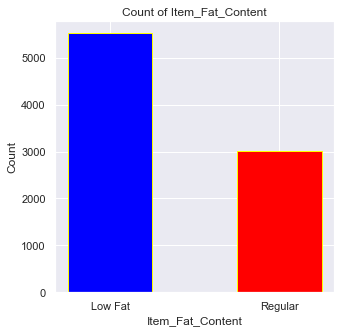

In [55]:
plt.rcParams['figure.figsize']=(5,5)
plt.bar(['Low Fat','Regular'],data.Item_Fat_Content.value_counts(),width=0.5,color=['blue', 'red'],edgecolor='yellow')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Count of Item_Fat_Content')
plt.show()

C:\Users\Harshil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


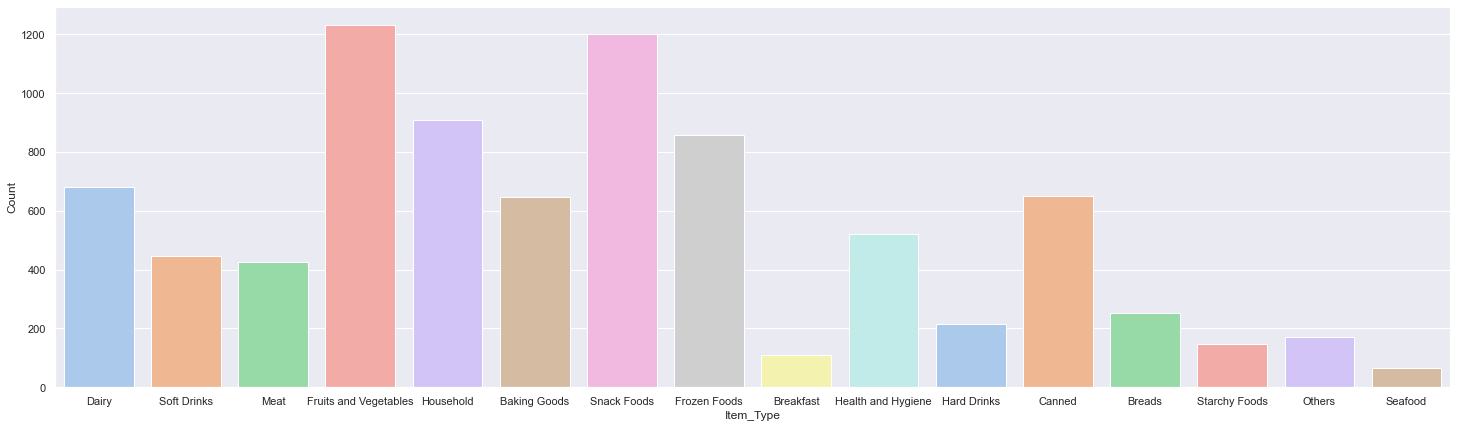

In [56]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=data,palette='pastel')
plt.xlabel('Item_Type')
plt.ylabel('Count')
plt.show()

C:\Users\Harshil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


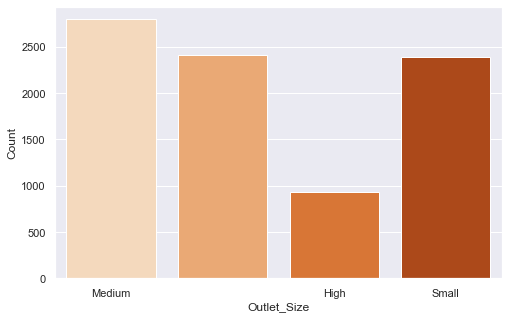

In [57]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=data,palette='Oranges')
plt.xlabel('Outlet_Size')
plt.ylabel('Count')
plt.show()

C:\Users\Harshil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


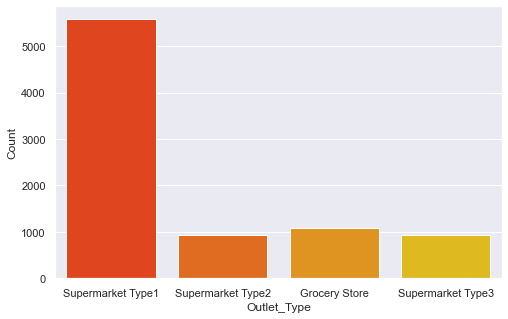

In [58]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=data,palette='autumn')
plt.xlabel('Outlet_Type')
plt.ylabel('Count')
plt.show()

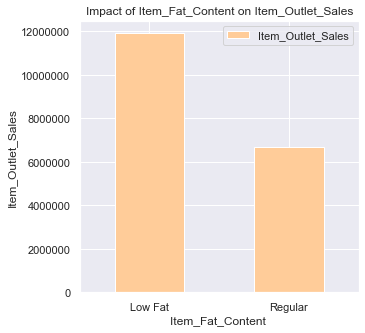

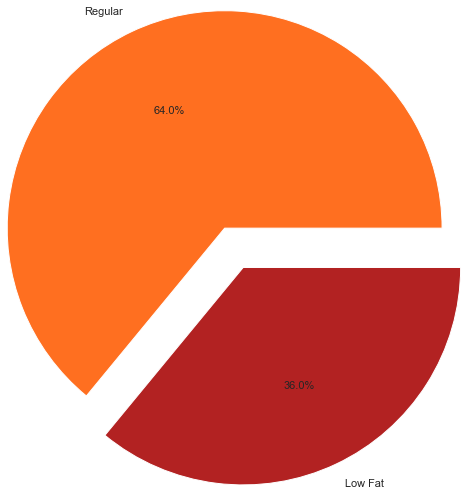

In [59]:
Outlet_Type_pivot = data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.sum)
Outlet_Type_pivot.plot(kind='bar', color='#ffcc99',figsize=(5,5))
plt.xlabel("Item_Fat_Content ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style="plain")
plt.show()

df3=data.groupby(by='Item_Fat_Content').sum()
df2=df3['Item_Outlet_Sales'].sort_values(ascending=False)
plt.rcParams['font.size'] = 11
plt.pie(df2, autopct = '%0.1f%%', radius = 2.0, labels = ['Regular','Low Fat'],explode = [0.2,0.2],colors=['#FF6F20', '#B22222'])
plt.show()

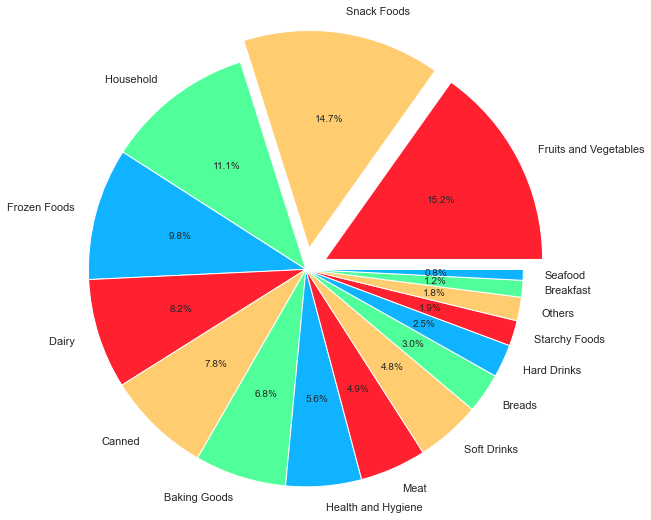

In [60]:
df3=data.groupby(by='Item_Type').sum()
df2=df3['Item_Outlet_Sales'].sort_values(ascending=False)
plt.rcParams['font.size'] = 10
plt.pie(df2, autopct = '%0.1f%%', radius = 2.0, labels = ['Fruits and Vegetables', 'Snack Foods','Household ','Frozen Foods','Dairy ', 'Canned','Baking Goods','Health and Hygiene','Meat', 'Soft Drinks','Breads','Hard Drinks','Starchy Foods', 'Others','Breakfast','Seafood'],
      explode = [0.2,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0],colors=['#ff2030', '#ffcc70', '#50ff99', '#10b3ff'])
plt.show()

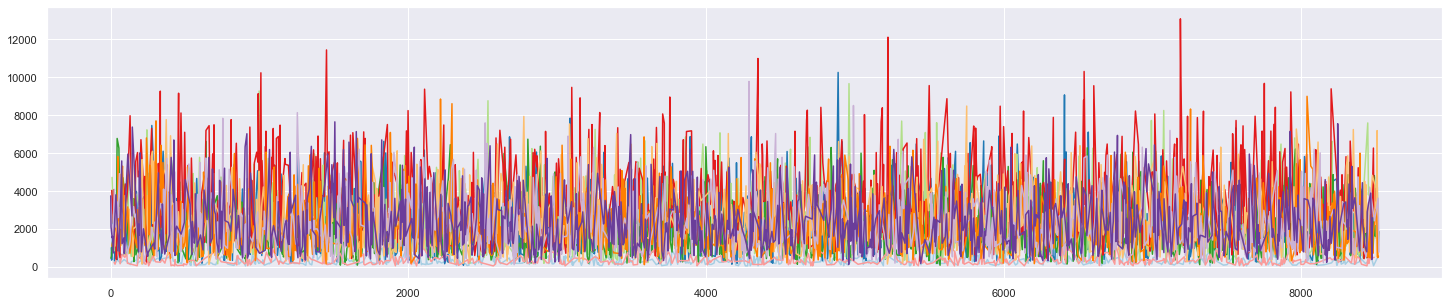

In [76]:
type1=data.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].plot()

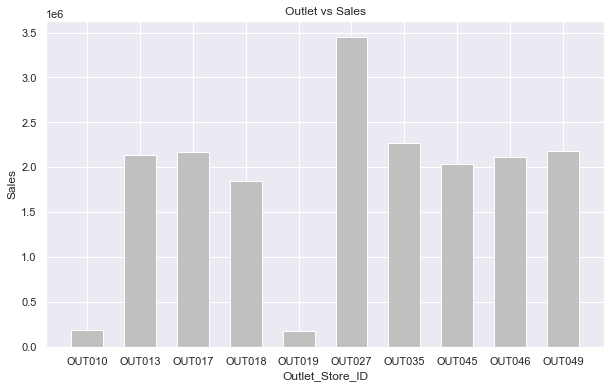

In [62]:
plt.rcParams['figure.figsize']=(10,6)
a=['OUT010','OUT013','OUT017','OUT018','OUT019','OUT027','OUT035','OUT045','OUT046','OUT049']
plt.bar(a,type1,color='silver',width=0.6)
plt.xlabel('Outlet_Store_ID')
plt.ylabel('Sales')
plt.title('Outlet vs Sales')
plt.show()


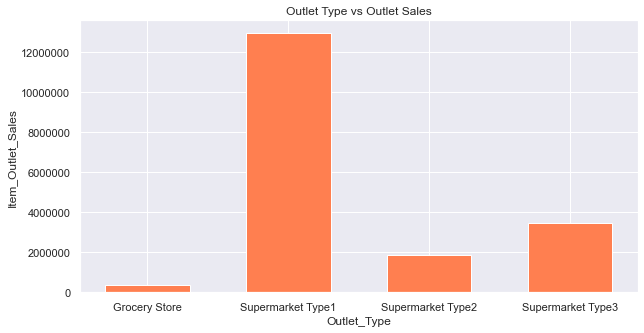

In [63]:
plt.figure(figsize=(10,5))
type2=data.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()
store_types=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
plt.bar(store_types,type2, width=0.6,color='coral')
plt.ticklabel_format(axis="y", style="plain")
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet Type vs Outlet Sales')
plt.show()

In [64]:
#sci to plain
#x and y

type3 = data.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()
size = ['High', 'Medium', 'Small']
type3

Outlet_Size
          4.392531e+06
High      2.142664e+06
Medium    7.489719e+06
Small     4.566212e+06
Name: Item_Outlet_Sales, dtype: float64

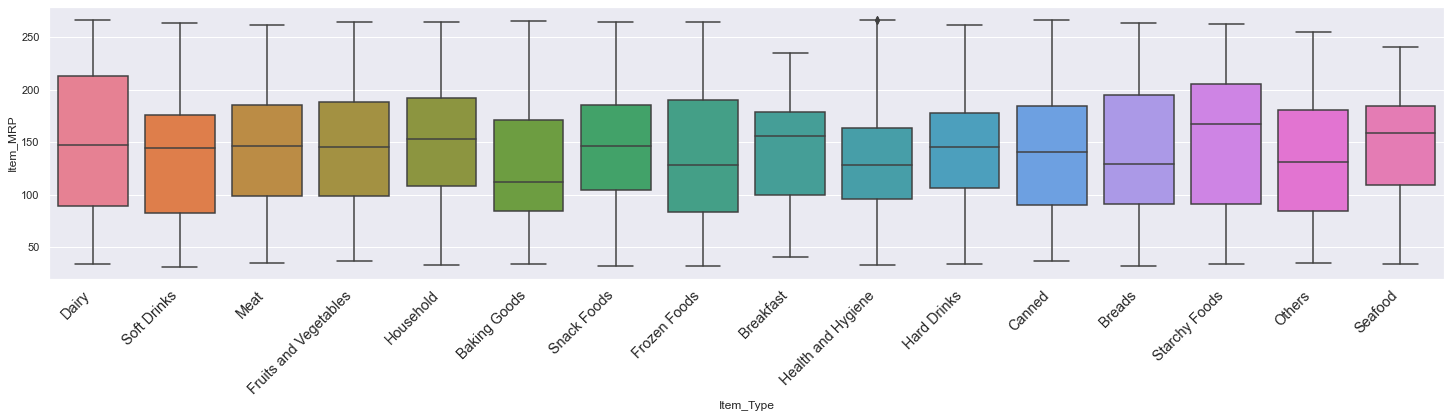

In [65]:
plt.rcParams['figure.figsize'] = 25,5
chart=sns.boxplot(x="Item_Type",y="Item_MRP",data=data,palette='husl')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right', fontweight='light',fontsize='x-large')
plt.show()


C:\Users\Harshil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


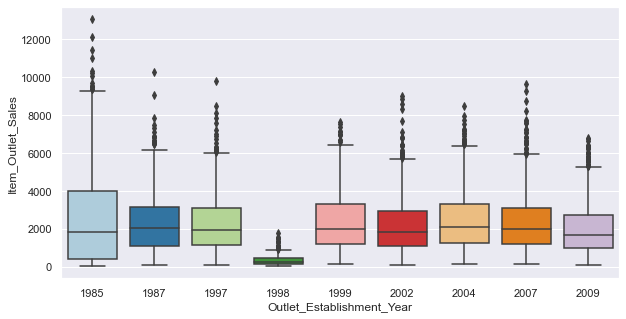

In [66]:
plt.figure(figsize=(10,5))
sns.boxplot('Outlet_Establishment_Year','Item_Outlet_Sales',data=data,palette="Paired")
plt.show()


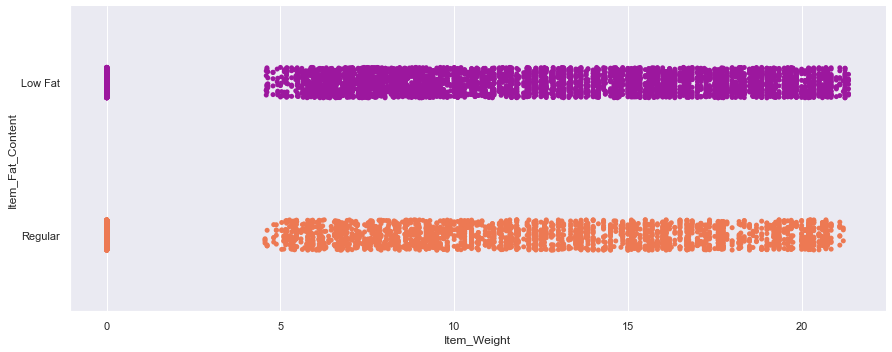

In [67]:
sns.catplot(x="Item_Weight", y="Item_Fat_Content", data=data,aspect=2.5,palette='plasma')

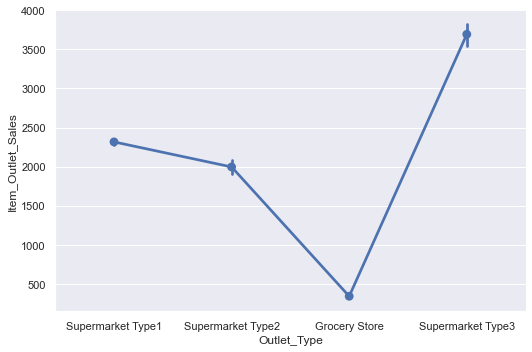

In [68]:
sns.catplot(x="Outlet_Type", y="Item_Outlet_Sales",kind="point", data=data,aspect=1.5)

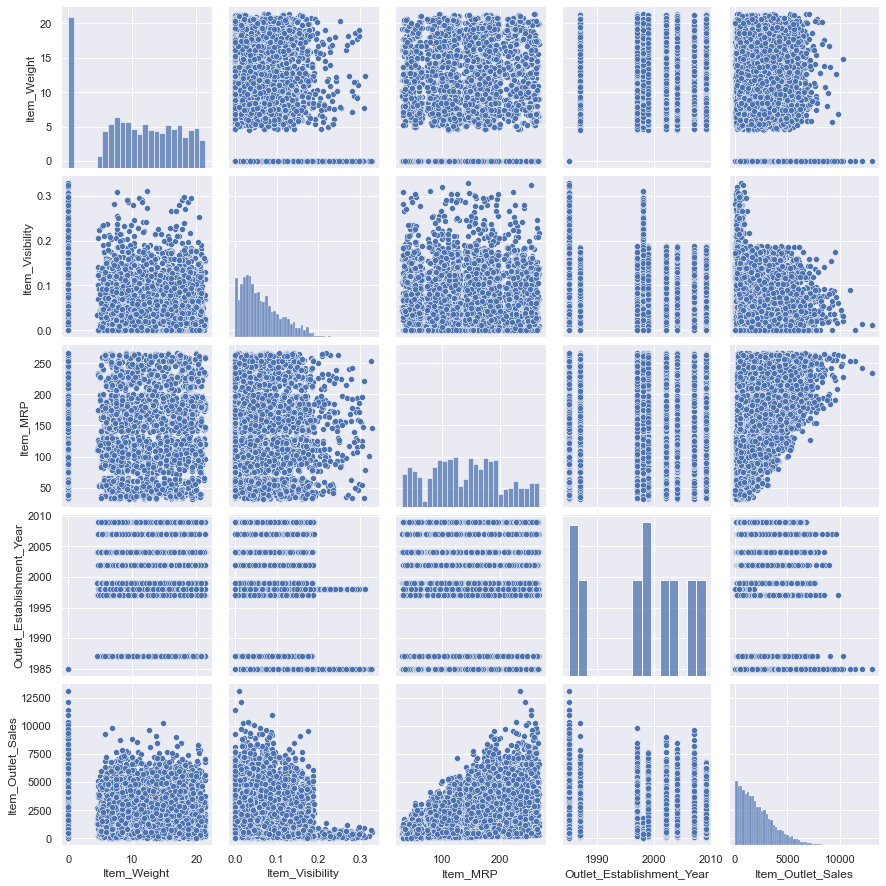

In [69]:
sns.pairplot(data,palette='plasma')

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Weight'>

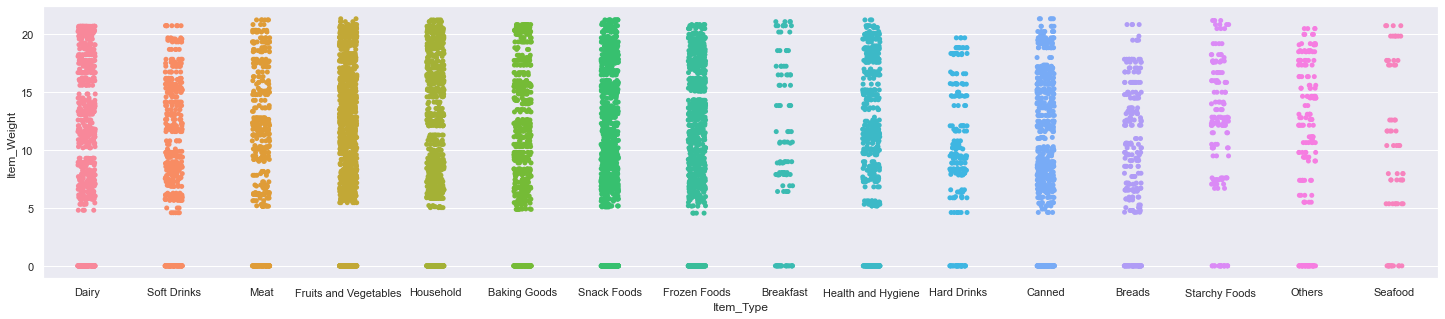

In [70]:
sns.set_palette("Paired")
sns.stripplot(x="Item_Type", y="Item_Weight", data=data)